# Proyecto del Día 12 - Análisis y Clasificación de Clientes

Bienvenido al **Proyecto del Día 12**. Lee atentamente la consigna *¡y a programar!*


### Título: Análisis y Clasificación de Clientes para Campañas de Marketing

En este proyecto, vas a aplicar técnicas avanzadas de análisis de datos para resolver un problema de clasificación de clientes en un conjunto de datos simulado.

El objetivo es identificar distintos segmentos de clientes basados en sus comportamientos de compra y características demográficas para diseñar campañas de marketing más efectivas.


### Descripción del Proyecto

Este proyecto tiene como objetivo utilizar técnicas de análisis de datos y aprendizaje automático para identificar diferentes segmentos de clientes basados en sus comportamientos de compra y características demográficas. Esto te permitirá desarrollar estrategias de marketing dirigidas y personalizadas. Vas a aplicar métodos de preprocesamiento de datos, reducción de dimensiones, y técnicas de clustering para analizar un conjunto de datos simulado de clientes.


### Datos

Vas a utilizar un dataset simulado llamado `datos_clientes.csv` que te descargarás en los recursos de esta lección, y que contiene información demográfica y de comportamiento de compra de clientes, como la edad, los ingresos anuales, la puntuación de gasto y la categoría de producto favorito.


### Consigna del Proyecto

1. **Preprocesamiento de Datos**: Cargar, limpiar y preparar el dataset para el análisis. Esto incluye la normalización de los datos para asegurar que las técnicas de reducción de dimensiones y clustering funcionen correctamente.
2. **Reducción de Dimensiones**: Utilizar **PCA** y **SVD** para reducir la cantidad de variables y destacar las características más importantes que influyen en el comportamiento del cliente.
3. **Clustering**: Implementar **K-Means** y **Clustering Jerárquico** para segmentar los clientes en grupos basados en similitudes en sus datos. Esto ayudará a identificar patrones y tendencias entre diferentes tipos de clientes.
4. **Visualización de Datos**: Crear visualizaciones para interpretar los resultados de las técnicas de reducción de dimensiones y clustering. Esto incluye la creación de **gráficos de dispersión** para los resultados de PCA y la visualización de **dendrogramas** para el Clustering Jerárquico.
5. **Interpretación y Estrategias de Marketing**: Analizar los clusters obtenidos y desarrollar propuestas de estrategias de marketing específicas para cada segmento de clientes. Deberás justificar tus estrategias basándote en las características y comportamientos de los grupos identificados.

¡Mucha suerte, y que te diviertas!

## Análisis y Clasificación de Clientes para Campañas de Marketing

### 1. Preprocesamiento de Datos

In [63]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [79]:
# Cargar los datos
data = pd.read_csv("./customer_data.csv")
data.head()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría de Producto Favorito
0,1,56,89,47,Libros
1,2,69,91,86,Hogar
2,3,46,46,23,Electrónica
3,4,32,28,66,Libros
4,5,60,81,27,Electrónica


In [65]:
# Ver información básica del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID Cliente                      200 non-null    int64 
 1   Edad                            200 non-null    int64 
 2   Ingresos Anuales (k$)           200 non-null    int64 
 3   Puntuación de Gasto (1-100)     200 non-null    int64 
 4   Categoría de Producto Favorito  200 non-null    object
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [66]:
# Ver la descripción de las estadísticas básicas del dataset
data.describe()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100)
count,200.000000,200.00000,200.000000,200.000000
mean,100.500000,43.42500,69.580000,49.910000
std,57.879185,14.94191,29.693808,29.409292
min,1.000000,18.00000,20.000000,1.000000
25%,50.750000,31.00000,43.750000,24.000000
50%,100.500000,43.50000,69.500000,50.000000
75%,150.250000,56.00000,92.500000,74.000000
max,200.000000,69.00000,119.000000,99.000000


In [67]:
# Normalizar los datos
columnas_a_normalizar = ['Edad', 'Ingresos Anuales (k$)', 'Puntuación de Gasto (1-100)']
scaler = MinMaxScaler()
data_normalizada = scaler.fit_transform(data[columnas_a_normalizar])

In [68]:
data_normalizada

array([[0.74509804, 0.6969697 , 0.46938776],
       [1.        , 0.71717172, 0.86734694],
       [0.54901961, 0.26262626, 0.2244898 ],
       [0.2745098 , 0.08080808, 0.66326531],
       [0.82352941, 0.61616162, 0.26530612],
       [0.1372549 , 0.36363636, 0.01020408],
       [0.39215686, 0.96969697, 0.90816327],
       [0.74509804, 0.50505051, 0.16326531],
       [0.35294118, 0.43434343, 0.32653061],
       [0.43137255, 0.23232323, 0.08163265],
       [0.19607843, 0.78787879, 0.42857143],
       [0.19607843, 0.58585859, 0.47959184],
       [0.45098039, 0.31313131, 0.3877551 ],
       [0.68627451, 0.95959596, 0.93877551],
       [0.76470588, 0.87878788, 0.41836735],
       [0.45098039, 0.51515152, 0.25510204],
       [0.03921569, 0.61616162, 1.        ],
       [0.41176471, 0.57575758, 0.5       ],
       [0.01960784, 0.51515152, 0.24489796],
       [0.45098039, 0.11111111, 0.23469388],
       [0.84313725, 0.38383838, 0.12244898],
       [0.56862745, 0.01010101, 0.60204082],
       [0.

### 2. Reducción de Dimensiones: PCA y SVD

In [69]:
# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_normalizada)

In [70]:
# Aplicar SVD
U, sigma, VT = np.linalg.svd(data_normalizada)

In [71]:
# Seleccionar los dos primeros componentes singulares para reducción de dimensiones
k = 2
svd_result = U[:, :k] * sigma[:k]

### 3. Clustering: K-Means y Clustering Jerárquico

In [72]:
# Aplicar K-Means
kmeans= KMeans(
    n_clusters=3,
    random_state=42
)
kmeans_clusters = kmeans.fit_predict(data_normalizada)

In [73]:
# Aplicar Clustering Jerárquico
linked = linkage(data_normalizada, "ward")

### 4. Visualización de Datos

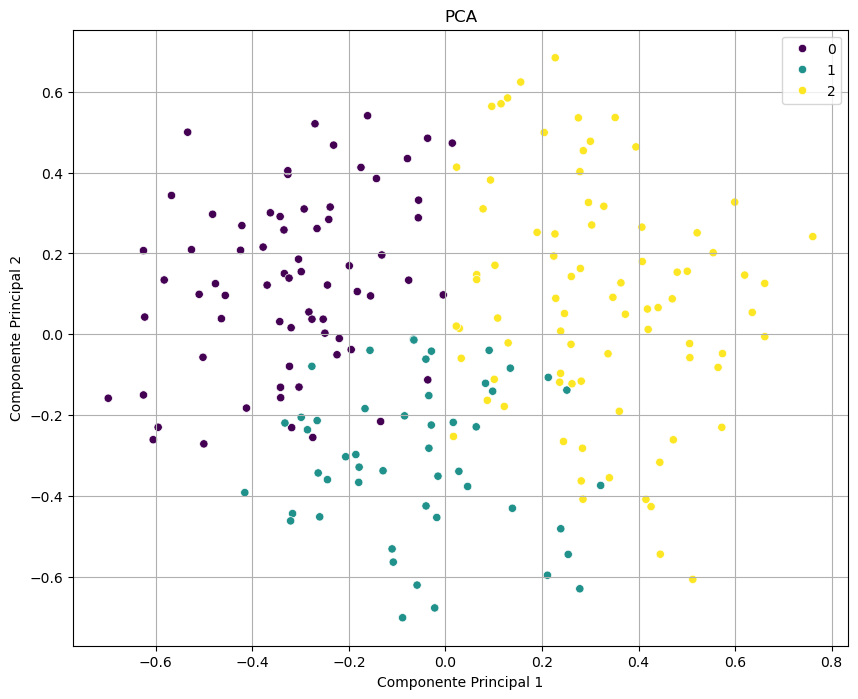

In [74]:
# Crear un gráfico de dispersión para los resultados de PCA
plt.figure(figsize=(10,8))
sns.scatterplot(
    x=pca_result[:, 0], 
    y=pca_result[:, 1], 
    hue=kmeans_clusters,
    palette="viridis"
    )    
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.title("PCA")
plt.grid(True)
plt.show()

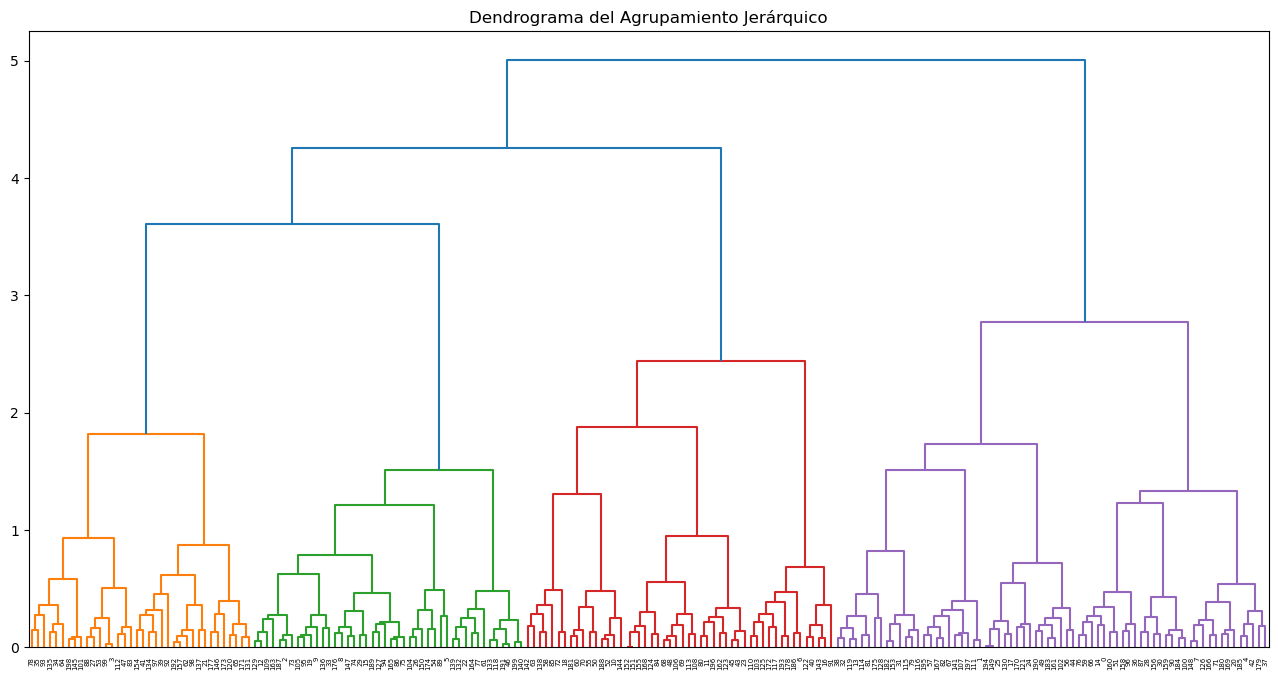

In [75]:
# Crear un dendrograma del clústering jerárquico
plt.figure(figsize=(16,8))
dendrogram(
    linked, 
    orientation="top",
    distance_sort="descending", 
    show_leaf_counts=True 
)
plt.xlabel("")
plt.ylabel("")
plt.title("Dendrograma del Agrupamiento Jerárquico")
plt.show()

### 5. Interpretación y Estrategias de Marketing basadas en los Clusters

In [76]:
# Escribe un loop que te permita mostrar los datos básicos de los diferentes clusters, como:
## su edad media
## sus ingresos medios
## su puntuación de gastos media

dic = {
    "Cluster" : kmeans_clusters,
    "Edad" : data["Edad"],
    "Ingresos" : data["Ingresos Anuales (k$)"],
    "Gasto" : data["Puntuación de Gasto (1-100)"]
}

new_data = pd.DataFrame(dic)
new_data.head()

,Cluster,Edad,Ingresos,Gasto
0,2,56,89,47
1,2,69,91,86
2,0,46,46,23
3,1,32,28,66
4,2,60,81,27


In [77]:
for cluster in new_data["Cluster"].unique():
    cluster_data = new_data[new_data["Cluster"] == cluster]
    print(f"Cluster: {cluster}")
    print(f"Edad media: {cluster_data["Edad"].mean():.0f}")
    print(f"Ingresos medios: {cluster_data["Ingresos"].mean():.2f}")
    print(f"Puntuación de gasto medio: {cluster_data["Gasto"].mean():.2f} \n")

Cluster: 2
Edad media: 50
Ingresos medios: 97.33
Puntuación de gasto medio: 62.00 

Cluster: 0
Edad media: 43
Ingresos medios: 52.51
Puntuación de gasto medio: 20.17 

Cluster: 1
Edad media: 34
Ingresos medios: 49.08
Puntuación de gasto medio: 72.20 



In [78]:
# Redacta una propuesta de estrategia de marketing para los diferentes clusters